In [1]:
import os 
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Analyze

In [2]:
### Input ###
Dataset = "BankNote"
Directory = "/Users/simondn/Documents/RashomonActiveLearning/Results/OptimalThreshold/"


## If Only Mean Values 

In [3]:
### If only Mean Values ###
with open(f"/Users/simondn/Documents/RashomonActiveLearning/Results/OptimalThreshold/{Dataset}/Processed/FRTMeanValues.pkl", "rb") as file:
    MeanValues = pickle.load(file)
ThresholdValues_Mean = MeanValues["ThresholdValues_Mean"]
Epsilon_F1Score_Mean = MeanValues["Epsilon_F1Score_Mean"]
Epsilon_ClassAccuracy_Mean = MeanValues["Epsilon_ClassAccuracy_Mean"]

## If all data present

In [4]:
# ### All values ###
# ThresholdValuesALL = pd.read_csv(os.path.join(Directory,Dataset,"Processed/ThresholdValuesStorage.csv"))
# Epsilon_F1ScoreALL = pd.read_csv(os.path.join(Directory,Dataset,"Processed/Epsilon_F1ScoreStorage.csv"))
# Epsilon_ClassAccuracyALL = pd.read_csv(os.path.join(Directory,Dataset,"Processed/Epsilon_ClassAccuracyStorage.csv"))

### Average Values ###
# ThresholdValues_Mean = np.mean(ThresholdValuesALL, axis =0)
# Epsilon_F1Score_Mean = np.mean(Epsilon_F1ScoreALL, axis =0)
# Epsilon_ClassAccuracy_Mean = np.mean(Epsilon_ClassAccuracyALL, axis =0)

In [5]:
# print(ThresholdValuesALL.shape[0])
# print(Epsilon_F1ScoreALL.shape[0])
# print(Epsilon_ClassAccuracyALL.shape[0])
# # np.where(Epsilon_F1Score_Mean == np.max(Epsilon_F1Score_Mean))

# Optimal Threshold 

In [13]:
### Optimal Threshold ###
BestEpsilonValue = float(ThresholdValues_Mean.iloc[int(np.where(Epsilon_ClassAccuracy_Mean == np.max(Epsilon_ClassAccuracy_Mean))[0][0])])
print(f"The optimal epsilon value is {BestEpsilonValue}")

The optimal epsilon value is 0.28125100000000003


# Accuracy by Rashomon Threshold

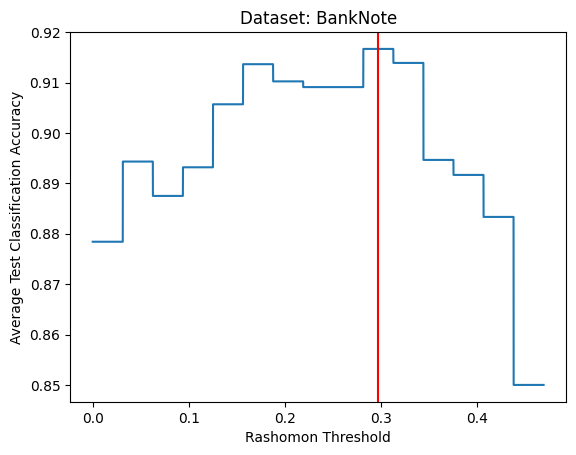

In [18]:
### Plot Accuracy ###
plt.plot(ThresholdValues_Mean, Epsilon_ClassAccuracy_Mean, label="Average Classification Accuracy")
plt.xlabel("Rashomon Threshold")
plt.ylabel("Average Test Classification Accuracy")
plt.title("Dataset: " + Dataset)
plt.axvline(x = BestEpsilonValue+0.015, color = 'red', label = 'axvline - full height')
# plt.xticks(np.arange(0, np.max(ThresholdValues_Mean), 0.05)) 
# plt.xlim(0.025,0.035)
plt.show()

# F1 by Rashomon Threshold

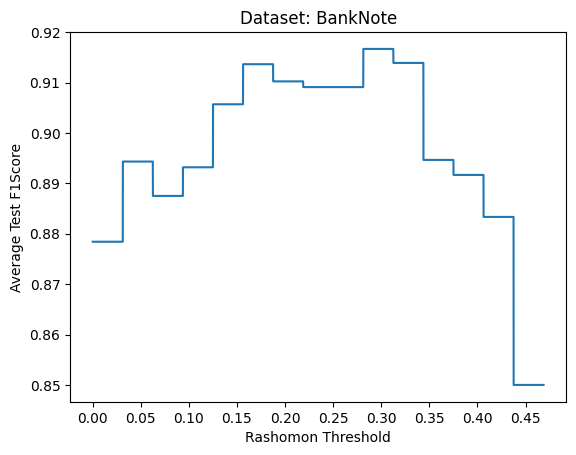

In [8]:
plt.plot(ThresholdValues_Mean, Epsilon_F1Score_Mean, label="Average F1 Score Accuracy")
plt.xlabel("Rashomon Threshold")
plt.ylabel("Average Test F1Score")
plt.title("Dataset: " + Dataset)
plt.xticks(np.arange(0, np.max(ThresholdValues_Mean), 0.05)) 
plt.show()